In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
df = pd.read_csv('/content/drive/MyDrive/IDSIA Biomedical Texts/AllSource_Intensity_ThirdJuly.csv', low_memory=False)
df.head(1)

,urls,text,source,label,WC,Analytic,Clout,Authentic,Tone,WPS,...,all_emo_labels,all_emo_label_rank,anger_intensity,anticipation_intensity,disgust_intensity,fear_intensity,joy_intensity,sadness_intensity,surprise_intensity,trust_intensity
0,https://www.quora.com/What-are-panic-attacks-l...,i have been dealing with these for quite some ...,Quora,1,607,55.22,35.35,48.82,1.0,26.39,...,"['fear', 'nervousness', 'confusion', 'curiosit...","{'fear': 1, 'nervousness': 2, 'confusion': 3, ...",0.415048,0.553423,0.272333,0.568205,0.4095,0.467625,0.4345,0.522773


## Getting 2 panic features

In [4]:
import regex as re

In [5]:
panic_symptoms = ["Palpitations", "Pounding heart", "Accelerated heart rate", "Sweating", "Trembling", "Shaking", "Shortness of breath",
"Smothering", "Feelings of choking", "Chest pain", "Discomfort", "Abdominal distress", "Nausea", "Dizziness", "Unsteadiness", "Lightheadedness",
"Faintness", "Chills", "Heat flashes", "Paresthesia", "Numbness", "Tingling sensations", "Derealization", "Depersonalization", "Fear of losing control",
"Fear of going crazy", "Fear of dying", "Mental images of dying", "Mental images of collapsing", "Agoraphobia", "Need to escape"]


panic_symptoms_ext = ["Palpitations", "Pounding heart", "Accelerated heart rate", "Sweating", "Trembling", "Shaking", "Shortness of breath",
"Smothering", "Feelings of choking", "Chest pain", "Discomfort", "Abdominal distress", "Nausea", "Dizziness", "Unsteadiness", "Lightheadedness",
"Faintness", "Chills", "Heat flashes", "Paresthesia", "Numbness", "Tingling sensations", "Derealization", "Depersonalization", "Fear of losing control",
"Fear of going crazy", "Fear of dying", "Mental images of dying", "Mental images of collapsing", "Agoraphobia", "Need to escape"
"Sweat", "Tremble", "Shake", "Shortage of breath","Feeling of choking","Dizzy",
"Faint","Fainted","Chill","Heat flash", "Numb", "Tingling sensation","Mental image of dying", "Mental image of collapsing"]

In [6]:
def count_symptoms_in_text(text, panic_list):
    if isinstance(text, str):
        count = 0
        for symptom in panic_list:
            match = re.search(r'\b{}\b'.format(symptom), text, re.IGNORECASE)
            if match:
                count += 1
        return count

In [7]:
df['symptoms_count'] = df['text'].apply(lambda x: count_symptoms_in_text(x,panic_symptoms))
df['symptoms_ext_count'] = df['text'].apply(lambda x: count_symptoms_in_text(x,panic_symptoms_ext))

In [8]:
pickle_in = open("/content/drive/MyDrive/IDSIA Biomedical Texts/Sentence Embeddings/AllSource_alldistilrobertav1_via_UMAP_SHORTembeddings.pickle", 'rb')
sentence_embeddings = pickle.load(pickle_in)
sentence_embeddings

array([[10.64194  ,  5.0430765,  5.6824026, ...,  4.9058275,  6.8707986,
         4.538727 ],
       [11.312859 ,  5.364349 ,  4.41365  , ...,  4.92234  ,  6.8475184,
         4.5590596],
       [10.531799 ,  4.894456 ,  5.387705 , ...,  4.8968716,  6.8360796,
         4.530069 ],
       ...,
       [10.346373 ,  4.4247556,  3.5815325, ...,  5.0401225,  6.552696 ,
         4.490976 ],
       [10.454275 ,  4.5640407,  3.6035635, ...,  5.0320673,  6.564847 ,
         4.4918733],
       [11.222271 ,  5.1468487,  4.0054016, ...,  5.079988 ,  6.6341186,
         4.5597043]], dtype=float32)

In [9]:
# Normalize sentence embeddings so that all values are between 0 and 1 (becasue emotions features are between 0 and 1 too)
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(0,1))  # (0,1) is default

In [10]:
sentence_embeddings = scaling.fit_transform(sentence_embeddings.reshape(-1, 1)).reshape(*sentence_embeddings.shape) # https://stackoverflow.com/questions/75461346/different-result-from-minmaxscaler-with-manual-calculations
sentence_embeddings

array([[0.8199141 , 0.35134387, 0.40484923, ..., 0.33985746, 0.5043063 ,
        0.30913472],
       [0.8760634 , 0.37823123, 0.298667  , ..., 0.3412394 , 0.502358  ,
        0.31083637],
       [0.81069636, 0.33890578, 0.3801859 , ..., 0.33910793, 0.5014007 ,
        0.30841014],
       ...,
       [0.795178  , 0.29959643, 0.22902691, ..., 0.35109666, 0.4776843 ,
        0.30513844],
       [0.80420834, 0.31125325, 0.2308707 , ..., 0.3504225 , 0.4787012 ,
        0.30521354],
       [0.8684821 , 0.3600286 , 0.26450062, ..., 0.354433  , 0.4844986 ,
        0.31089035]], dtype=float32)

In [11]:
sentence_embeddings.shape

(7405, 28)

In [12]:
# Standardization of LIWC features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [13]:
standardized_liwc = sc.fit_transform(df.loc[:, 'WC':'Emoji'])

In [14]:
# normalization of 2 panic features
normalized_panic_features = scaling.fit_transform(df[['symptoms_count', 'symptoms_ext_count']])

In [15]:
sentence_embeddings

array([[0.8199141 , 0.35134387, 0.40484923, ..., 0.33985746, 0.5043063 ,
        0.30913472],
       [0.8760634 , 0.37823123, 0.298667  , ..., 0.3412394 , 0.502358  ,
        0.31083637],
       [0.81069636, 0.33890578, 0.3801859 , ..., 0.33910793, 0.5014007 ,
        0.30841014],
       ...,
       [0.795178  , 0.29959643, 0.22902691, ..., 0.35109666, 0.4776843 ,
        0.30513844],
       [0.80420834, 0.31125325, 0.2308707 , ..., 0.3504225 , 0.4787012 ,
        0.30521354],
       [0.8684821 , 0.3600286 , 0.26450062, ..., 0.354433  , 0.4844986 ,
        0.31089035]], dtype=float32)

In [16]:
sentemb_column_names = ["sentemb" + str(i+1) for i in range(28)]

In [17]:
sentembdf = pd.DataFrame(sentence_embeddings, columns=sentemb_column_names)
sentembdf

,sentemb1,sentemb2,sentemb3,sentemb4,sentemb5,sentemb6,sentemb7,sentemb8,sentemb9,sentemb10,...,sentemb19,sentemb20,sentemb21,sentemb22,sentemb23,sentemb24,sentemb25,sentemb26,sentemb27,sentemb28
0,0.819914,0.351344,0.404849,0.211062,0.258971,0.257296,0.508351,0.079092,0.046841,0.526339,...,0.494592,0.289889,0.115539,0.196822,0.428880,0.426222,0.362514,0.339857,0.504306,0.309135
1,0.876063,0.378231,0.298667,0.214494,0.349709,0.284757,0.438802,0.078256,0.026417,0.481356,...,0.536341,0.269954,0.126838,0.195539,0.443481,0.403223,0.353871,0.341239,0.502358,0.310836
2,0.810696,0.338906,0.380186,0.207599,0.268363,0.274065,0.500595,0.077948,0.052404,0.508967,...,0.497243,0.285798,0.115411,0.195277,0.431129,0.421081,0.363387,0.339108,0.501401,0.308410
3,0.875869,0.375439,0.291701,0.216481,0.355757,0.287865,0.434504,0.078305,0.024242,0.476598,...,0.540063,0.268896,0.127621,0.195539,0.443904,0.402204,0.353474,0.342344,0.501798,0.311278
4,0.849092,0.364154,0.345076,0.144952,0.283609,0.274024,0.446017,0.077871,0.052790,0.488757,...,0.520263,0.277368,0.124095,0.195726,0.446654,0.415476,0.357244,0.337169,0.496036,0.308303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7400,0.808676,0.343545,0.265276,0.106535,0.323924,0.292145,0.382246,0.077382,0.073316,0.436193,...,0.546514,0.260041,0.122214,0.197972,0.459927,0.397550,0.356333,0.341254,0.485487,0.303029
7401,0.824678,0.309808,0.225578,0.204305,0.355065,0.360845,0.426495,0.070627,0.067943,0.404500,...,0.546183,0.259894,0.116986,0.200168,0.441317,0.389815,0.363444,0.354721,0.477989,0.306945
7402,0.795178,0.299596,0.229027,0.193240,0.349450,0.343462,0.422839,0.070439,0.078386,0.409807,...,0.543561,0.260543,0.115634,0.199547,0.446306,0.389455,0.364519,0.351097,0.477684,0.305138
7403,0.804208,0.311253,0.230871,0.186933,0.347010,0.343995,0.420793,0.071775,0.076749,0.414172,...,0.544412,0.260857,0.116057,0.199328,0.447040,0.390905,0.364248,0.350423,0.478701,0.305214


In [18]:
standardized_liwc

array([[ 3.67802528,  0.98063234, -0.11115907, ...,  0.13908545,
        -0.12035728,  0.17485002],
       [ 2.12422261,  0.93614355, -1.01518881, ..., -0.32861383,
        -0.30797786, -0.05320853],
       [ 2.46364552, -0.16631989,  1.42946272, ...,  0.82624363,
        -0.23487893, -0.05320853],
       ...,
       [-0.75710077,  0.25671387, -0.96127635, ..., -0.86826685,
        -0.30797786, -0.05320853],
       [-0.61378887,  0.25671387,  1.36359921, ..., -0.86826685,
        -0.30797786,  1.76434898],
       [ 0.50253537, -0.1292459 ,  0.3546659 , ..., -0.47971667,
        -0.13335265, -0.05320853]])

In [19]:
liwc_column_names = list(df.loc[:, 'WC':'Emoji'].columns)

In [20]:
stdliwcdf = pd.DataFrame(standardized_liwc, columns=liwc_column_names)
stdliwcdf

,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,function,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,3.678025,0.980632,-0.111159,-0.503463,-0.906085,0.507052,1.316973,0.342227,-0.601720,-0.018291,...,-0.181918,-0.109396,0.094036,-0.364488,1.739462,-0.232106,-0.240709,0.139085,-0.120357,0.174850
1,2.124223,0.936144,-1.015189,0.979755,-0.703811,-0.305294,-0.124287,-0.340482,0.082425,0.466392,...,-0.181918,-0.109396,-0.338164,0.031678,0.330742,-0.184911,-0.271948,-0.328614,-0.307978,-0.053209
2,2.463646,-0.166320,1.429463,0.293715,-0.906085,-0.375792,0.031591,0.709276,0.143365,0.234690,...,-0.181918,-0.109396,-0.129423,0.213881,-0.231101,-0.200643,-0.271948,0.826244,-0.234879,-0.053209
3,3.059521,0.021001,-0.971103,0.892855,-0.749503,-0.201164,-0.350683,-0.186322,-0.087749,-0.128231,...,2.806013,-0.109396,0.200414,-0.244134,0.388297,0.281791,-0.271948,1.531390,-0.029390,-0.053209
4,1.535890,-0.332567,-1.023422,0.979755,-0.902879,-0.329225,0.032829,0.298182,0.202006,0.394281,...,-0.181918,-0.109396,-0.017025,0.055080,0.218374,0.171670,-0.271948,1.024116,-0.257621,-0.053209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7400,0.887215,-0.969850,-0.505012,-0.373113,-0.518371,-0.104795,0.415103,0.252301,0.893050,0.616526,...,-0.181918,-0.109396,-0.561623,-0.217388,-0.505171,-0.316007,-0.271948,0.041948,-0.273865,-0.053209
7401,-0.749558,0.374960,-1.023422,-1.102307,1.712520,0.093764,1.210579,0.573468,-1.045551,-2.087060,...,-0.181918,-0.109396,-1.239361,-1.135089,-0.968349,-0.316007,-0.271948,-0.868267,-0.307978,-0.053209
7402,-0.757101,0.256714,-0.961276,0.130851,1.712520,0.029087,0.721912,0.525752,-0.047505,-1.215812,...,-0.181918,-0.109396,-1.239361,-1.135089,-0.968349,-0.316007,-0.271948,-0.868267,-0.307978,-0.053209
7403,-0.613789,0.256714,1.363599,-0.953040,1.532692,0.029087,0.721912,1.008420,-1.257118,-0.594000,...,-0.181918,-0.109396,-1.063404,-0.695462,-0.968349,-0.316007,-0.271948,-0.868267,-0.307978,1.764349


In [21]:
emodf = df.loc[:, 'admiration':'neutral']
emodf

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity.1,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,0.000016,0.000150,0.000705,0.001447,0.000643,0.009114,0.048850,0.010012,0.000057,0.000440,...,0.000210,0.068864,0.000185,0.000041,0.000323,0.001267,0.000330,0.000575,0.000205,0.000843
1,0.000054,0.167888,0.011522,0.201494,0.000443,0.001504,0.002532,0.000539,0.000486,0.053486,...,0.003212,0.013415,0.000246,0.000617,0.022932,0.000231,0.003261,0.416074,0.001216,0.003240
2,0.000101,0.000596,0.000428,0.001275,0.006295,0.013178,0.412494,0.034596,0.000124,0.002020,...,0.001481,0.035853,0.000615,0.000224,0.336612,0.002241,0.001373,0.007805,0.013074,0.041802
3,0.000054,0.000639,0.043696,0.003672,0.000041,0.007463,0.000333,0.000094,0.000294,0.002422,...,0.005427,0.010949,0.000076,0.000740,0.000619,0.000275,0.001561,0.057985,0.000332,0.000073
4,0.000004,0.000040,0.000176,0.000860,0.000181,0.000255,0.001674,0.000182,0.000016,0.001535,...,0.000145,0.079422,0.000020,0.000017,0.000338,0.000211,0.000071,0.002956,0.000103,0.000174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7400,0.000907,0.000017,0.000027,0.000027,0.000360,0.001514,0.000162,0.000076,0.000035,0.000038,...,0.000018,0.000038,0.000060,0.000021,0.000021,0.000448,0.000136,0.000022,0.000016,0.000068
7401,0.000451,0.000075,0.000005,0.000022,0.000736,0.000157,0.000070,0.000227,0.000052,0.000015,...,0.000010,0.000004,0.000037,0.000003,0.000018,0.000051,0.000023,0.000008,0.000011,0.001105
7402,0.000228,0.000024,0.000010,0.000034,0.000405,0.000364,0.000123,0.000703,0.000040,0.000015,...,0.000008,0.000007,0.000077,0.000003,0.000009,0.000134,0.000023,0.000008,0.000013,0.000393
7403,0.000064,0.000080,0.000109,0.000155,0.012040,0.932658,0.000593,0.001206,0.000311,0.000126,...,0.000124,0.016793,0.015985,0.000026,0.000285,0.005689,0.000256,0.000404,0.000174,0.003708


In [22]:
intensitydf = df.loc[:, 'anger_intensity':'trust_intensity']
intensitydf

,anger_intensity,anticipation_intensity,disgust_intensity,fear_intensity,joy_intensity,sadness_intensity,surprise_intensity,trust_intensity
0,0.415048,0.553423,0.272333,0.568205,0.409500,0.467625,0.434500,0.522773
1,0.530400,0.519750,0.541250,0.432167,0.453429,0.315600,0.247333,0.508875
2,0.428600,0.533500,0.228167,0.526192,0.413444,0.468533,0.348500,0.504500
3,0.567200,0.533462,0.114667,0.501952,0.505000,0.522095,0.320500,0.593615
4,0.487000,0.508000,0.482250,0.624833,0.489167,0.505333,0.000000,0.527167
...,...,...,...,...,...,...,...,...
7400,0.396000,0.609000,0.484000,0.527500,0.434000,0.591000,0.793000,0.540800
7401,0.000000,0.000000,0.000000,0.156000,0.000000,0.000000,0.000000,0.000000
7402,0.000000,0.000000,0.000000,0.156000,0.000000,0.000000,0.000000,0.641000
7403,0.344000,0.528667,0.000000,0.414000,0.515500,0.500000,0.363500,0.613000


In [23]:
rfecv_df = pd.concat([sentembdf, stdliwcdf, emodf, intensitydf, df['symptoms_ext_count']], axis=1)
rfecv_df

,sentemb1,sentemb2,sentemb3,sentemb4,sentemb5,sentemb6,sentemb7,sentemb8,sentemb9,sentemb10,...,neutral,anger_intensity,anticipation_intensity,disgust_intensity,fear_intensity,joy_intensity,sadness_intensity,surprise_intensity,trust_intensity,symptoms_ext_count
0,0.819914,0.351344,0.404849,0.211062,0.258971,0.257296,0.508351,0.079092,0.046841,0.526339,...,0.000843,0.415048,0.553423,0.272333,0.568205,0.409500,0.467625,0.434500,0.522773,8
1,0.876063,0.378231,0.298667,0.214494,0.349709,0.284757,0.438802,0.078256,0.026417,0.481356,...,0.003240,0.530400,0.519750,0.541250,0.432167,0.453429,0.315600,0.247333,0.508875,1
2,0.810696,0.338906,0.380186,0.207599,0.268363,0.274065,0.500595,0.077948,0.052404,0.508967,...,0.041802,0.428600,0.533500,0.228167,0.526192,0.413444,0.468533,0.348500,0.504500,3
3,0.875869,0.375439,0.291701,0.216481,0.355757,0.287865,0.434504,0.078305,0.024242,0.476598,...,0.000073,0.567200,0.533462,0.114667,0.501952,0.505000,0.522095,0.320500,0.593615,1
4,0.849092,0.364154,0.345076,0.144952,0.283609,0.274024,0.446017,0.077871,0.052790,0.488757,...,0.000174,0.487000,0.508000,0.482250,0.624833,0.489167,0.505333,0.000000,0.527167,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7400,0.808676,0.343545,0.265276,0.106535,0.323924,0.292145,0.382246,0.077382,0.073316,0.436193,...,0.000068,0.396000,0.609000,0.484000,0.527500,0.434000,0.591000,0.793000,0.540800,1
7401,0.824678,0.309808,0.225578,0.204305,0.355065,0.360845,0.426495,0.070627,0.067943,0.404500,...,0.001105,0.000000,0.000000,0.000000,0.156000,0.000000,0.000000,0.000000,0.000000,0
7402,0.795178,0.299596,0.229027,0.193240,0.349450,0.343462,0.422839,0.070439,0.078386,0.409807,...,0.000393,0.000000,0.000000,0.000000,0.156000,0.000000,0.000000,0.000000,0.641000,0
7403,0.804208,0.311253,0.230871,0.186933,0.347010,0.343995,0.420793,0.071775,0.076749,0.414172,...,0.003708,0.344000,0.528667,0.000000,0.414000,0.515500,0.500000,0.363500,0.613000,0


In [35]:
df['label']

0       1
1       1
2       1
3       1
4       1
       ..
7400    0
7401    0
7402    0
7403    0
7404    0
Name: label, Length: 7405, dtype: int64

In [44]:
from sklearn.feature_selection import RFECV
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

In [69]:
# took 24 mins to run with gpu

X = rfecv_df
y = df['label']

# Create an instance of the XGBoost classifier
xgb_classifier = XGBClassifier(objective='binary:logistic', seed=42)

# Create the RFECV object
rfecv = RFECV(estimator=xgb_classifier, step=10, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring='f1', min_features_to_select = 30)

# Fit the RFECV on your data
rfecv.fit(X, y)

# Get the accuracy for each feature subset size
print("Number of features selected: {}".format(rfecv.n_features_))
print("F1 Scores: {}".format(rfecv.cv_results_['mean_test_score']))

# Get the selected features and their rankings
selected_features = pd.DataFrame({'Feature': X.columns, 'Ranking': rfecv.ranking_})
selected_features.sort_values(by='Ranking', inplace=True)

# Print the selected features and their rankings
print("Selected Features:")
print(selected_features.head(10))

Number of features selected: 173
F1 Scores: [0.9240785  0.92475707 0.92713995 0.9253679  0.92815254 0.92848094
 0.92605707 0.92633103 0.92691943 0.92608025 0.92759041 0.92744701
 0.9271347  0.9274453  0.92777497 0.92882588 0.92767066]
Selected Features:
        Feature  Ranking
0      sentemb1        1
118      reward        1
119        risk        1
120   curiosity        1
121      allure        1
122  Perception        1
123   attention        1
124      motion        1
125       space        1
117     fatigue        1


In [70]:
selected_features.head(50)

,Feature,Ranking
0,sentemb1,1
118,reward,1
119,risk,1
120,curiosity,1
121,allure,1
122,Perception,1
123,attention,1
124,motion,1
125,space,1
117,fatigue,1


In [75]:
len(rfecv.cv_results_["mean_test_score"])

17

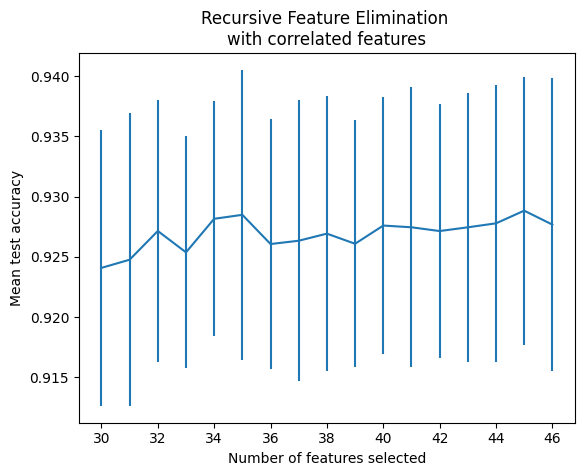

In [84]:
# Ref - https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

import matplotlib.pyplot as plt

min_features_to_select = 30

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

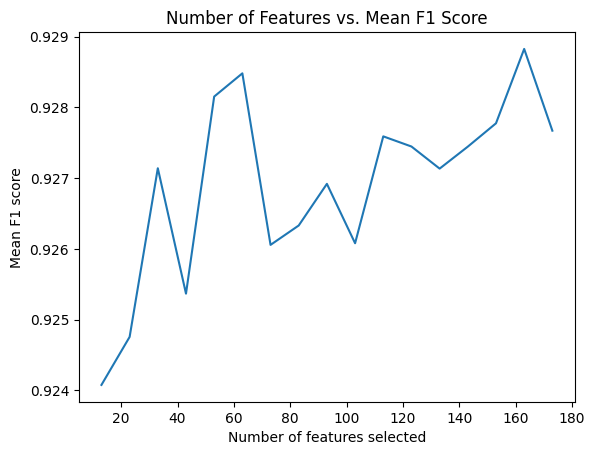

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Get the range of feature subset sizes
feature_sizes = np.arange(13, 183, 10)

# Plot the number of features vs. mean F1 score
plt.figure()
plt.plot(feature_sizes, rfecv.cv_results_['mean_test_score'])
plt.xlabel("Number of features selected")
plt.ylabel("Mean F1 score")
plt.title("Number of Features vs. Mean F1 Score")
plt.show()

In [72]:
rfecv.cv_results_["mean_test_score"]

array([0.9240785 , 0.92475707, 0.92713995, 0.9253679 , 0.92815254,
       0.92848094, 0.92605707, 0.92633103, 0.92691943, 0.92608025,
       0.92759041, 0.92744701, 0.9271347 , 0.9274453 , 0.92777497,
       0.92882588, 0.92767066])

In [78]:
rfecv.cv_results_["std_test_score"]

array([0.01142534, 0.01213225, 0.01083192, 0.00961738, 0.00976657,
       0.01202272, 0.01035232, 0.01166386, 0.01138334, 0.01025521,
       0.01063275, 0.01160082, 0.01053335, 0.01114531, 0.0114819 ,
       0.01110927, 0.01212435])

In [73]:
X.columns[rfecv.get_support()]

Index(['sentemb1', 'sentemb2', 'sentemb3', 'sentemb4', 'sentemb5', 'sentemb6',
       'sentemb7', 'sentemb8', 'sentemb9', 'sentemb10',
       ...
       'neutral', 'anger_intensity', 'anticipation_intensity',
       'disgust_intensity', 'fear_intensity', 'joy_intensity',
       'sadness_intensity', 'surprise_intensity', 'trust_intensity',
       'symptoms_ext_count'],
      dtype='object', length=173)

In [74]:
len(X.columns[rfecv.get_support()])

173

In [85]:
list1 = [1, 2, 3, 4, 5]
list2 = [4, 5, 6, 7, 8]

uncommon_elements = set(list1).symmetric_difference(set(list2))

print(uncommon_elements)

{1, 2, 3, 6, 7, 8}


In [87]:
set(list(rfecv_df.columns)).symmetric_difference(set(list(X.columns[rfecv.get_support()])))

{'Culture',
 'affiliation',
 'ethnicity',
 'family',
 'filler',
 'food',
 'illness',
 'memory',
 'sexual',
 'wellness'}